--------------------------------Seed_1---------------------------------------
 Turn sext off 
 BPM_to_corrector_response_matrices (Model) ..
 Introduce errors .. 
SVD orbit correction
Swich sextupoles ON
LOCO iterations

Fitting Tune...
Initial value [218.13902419 222.20114536]
iter# 0 Res. 1.2194595648493477e-06
iter# 1 Res. 1.4561854014298396e-08
iter# 2 Res. 1.8842067081993905e-10
Final value [218.15868319 222.19803566] 


Fitting Chromaticity...
Initial value [0.74650811 4.44421793]
iter# 0 Res. 2.3323067987629723e-07
iter# 1 Res. 3.314038690868717e-07
iter# 2 Res. 6.7751794290925e-08
Final value [0.03374486 5.01756216] 

Beta beating before correction :
RMS horizontal beta beating:6.321488560029357%   RMS vertical beta beating: 6.003898080320986%
Beta beating after corrections :
RMS horizontal beta beating:5.399505180826533%   RMS vertical beta beating: 5.295871179221696%
beta_x correction reduction 14.584909399860436
beta_x correction reduction 11.792786813287092
dispersion
dispe

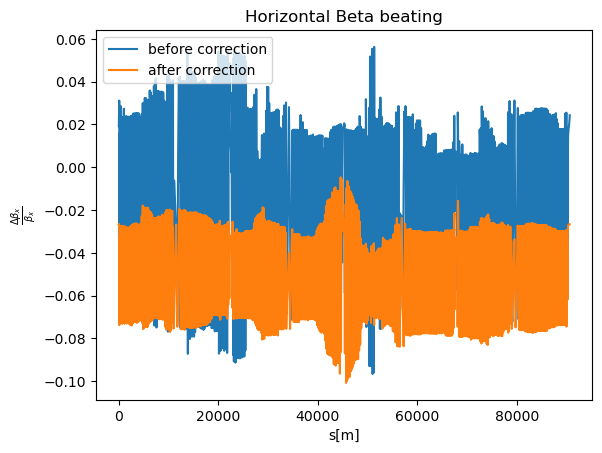

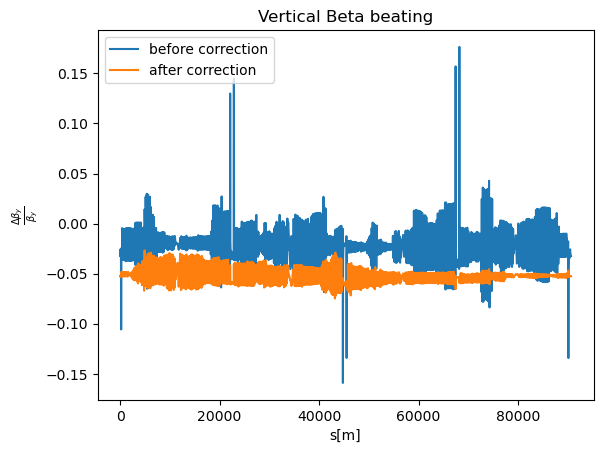

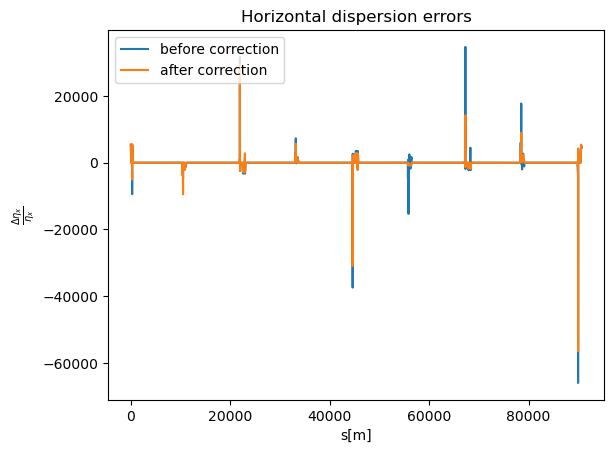

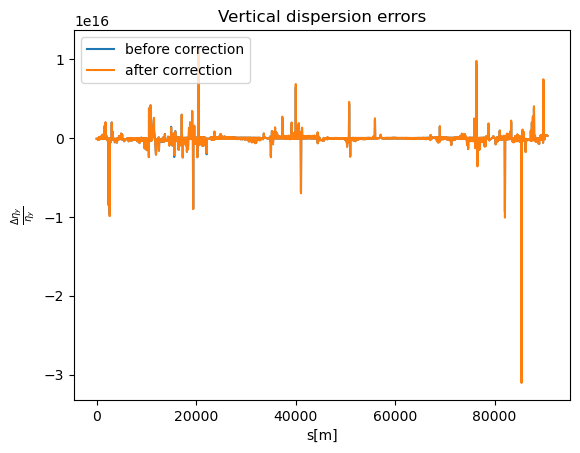


Fitting Tune...
Initial value [218.16059338 222.20044981]
iter# 0 Res. 1.4205874181318838e-09
iter# 1 Res. 1.6542603165813002e-11
iter# 2 Res. 1.9311938952673017e-13
Final value [218.15869253 222.19802621] 


Fitting Chromaticity...
Initial value [-0.2022523   4.44641881]
iter# 0 Res. 1.1559837650048709e-07
iter# 1 Res. 9.79932965801177e-08
iter# 2 Res. 1.6489220953455087e-08
Final value [0.03377484 5.01742955] 

Beta beating before correction :
RMS horizontal beta beating:5.541857727670256%   RMS vertical beta beating: 5.443803093353995%
Beta beating after corrections :
RMS horizontal beta beating:4.938646920096273%   RMS vertical beta beating: 38.946229252136064%
beta_x correction reduction 10.884631782627274
beta_x correction reduction -615.423180895046
dispersion
dispersion before correction :
RMS horizontal dispersion:33.10525115124339mm   RMS vertical dispersion: 42.56231156133993mm
dispersion after corrections
RMS horizontal dispersion:19.795317275047125mm   RMS vertical disper

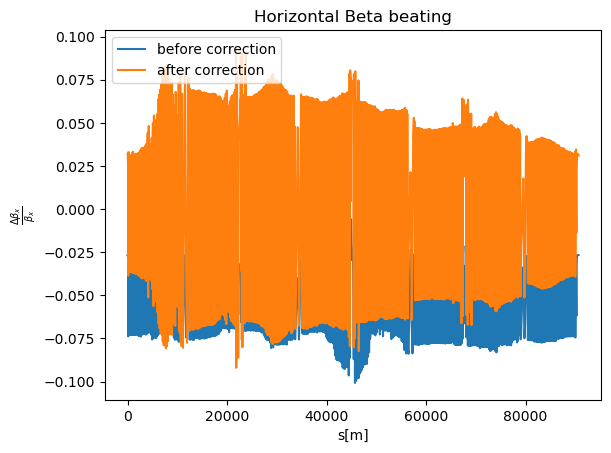

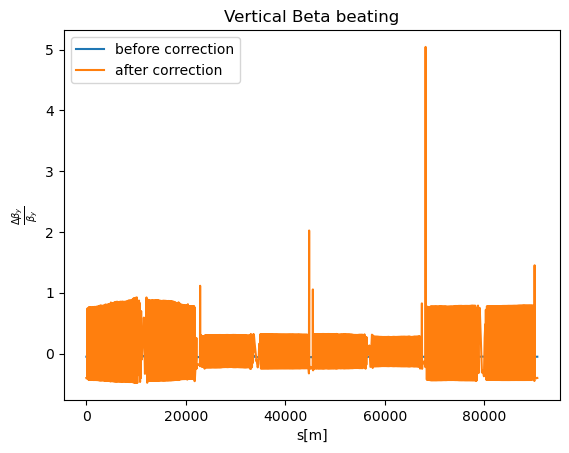

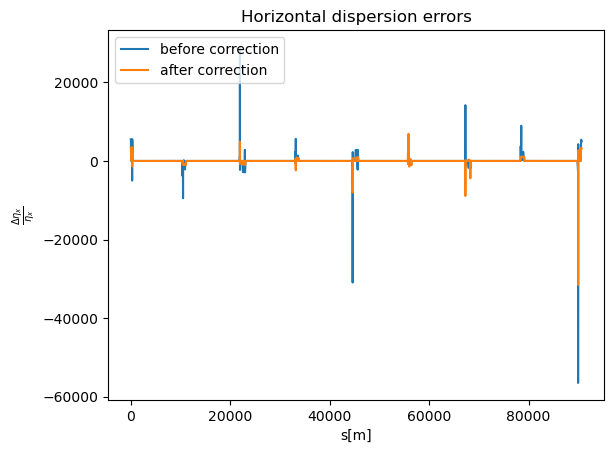

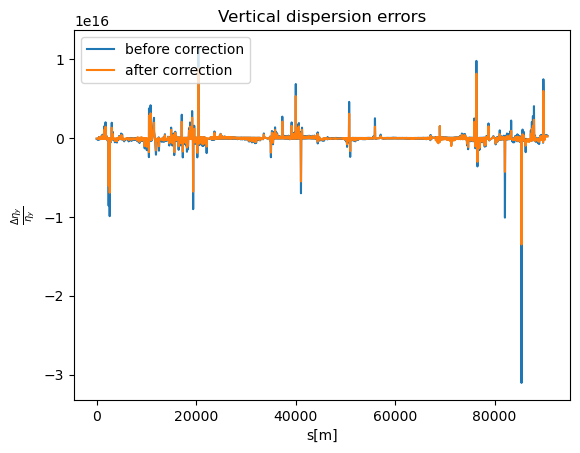


Fitting Tune...
An error occurred for Seed_1: Unstable ring
--------------------------------Seed_2---------------------------------------
 Turn sext off 
 BPM_to_corrector_response_matrices (Model) ..
 Introduce errors .. 
SVD orbit correction
Swich sextupoles ON
LOCO iterations

Fitting Tune...
An error occurred for Seed_2: Unstable ring
--------------------------------Seed_3---------------------------------------
 Turn sext off 
 BPM_to_corrector_response_matrices (Model) ..
 Introduce errors .. 
SVD orbit correction
Swich sextupoles ON
LOCO iterations

Fitting Tune...
Initial value [218.14559956 222.18581173]
iter# 0 Res. 4.6386791644641115e-08
iter# 1 Res. 6.171029522973017e-12
iter# 2 Res. 8.68988313707824e-16
Final value [218.15869285 222.19802593] 


Fitting Chromaticity...
Initial value [-1.69319941  6.64398381]
iter# 0 Res. 6.562949091520147e-07
iter# 1 Res. 1.6426124196646392e-08
iter# 2 Res. 7.416392114064292e-08
Final value [0.03375749 5.01757455] 

Beta beating before cor

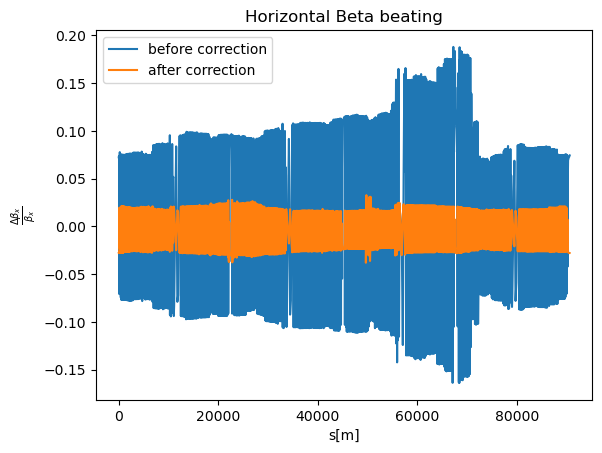

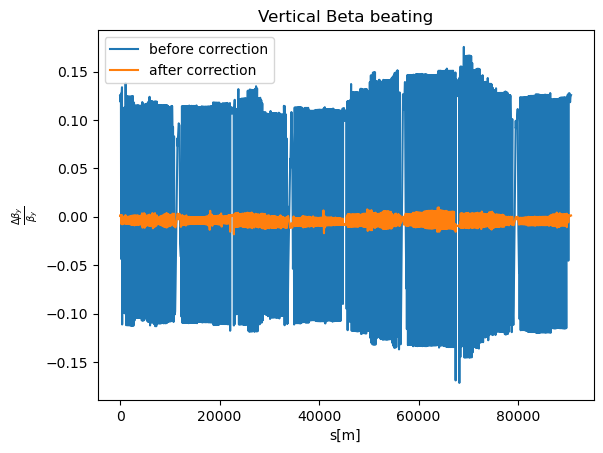

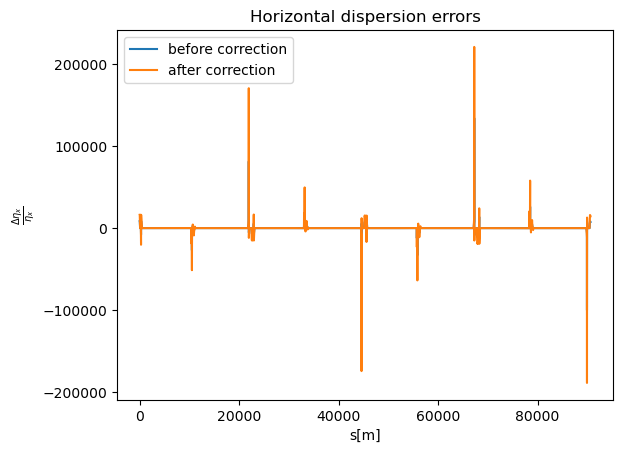

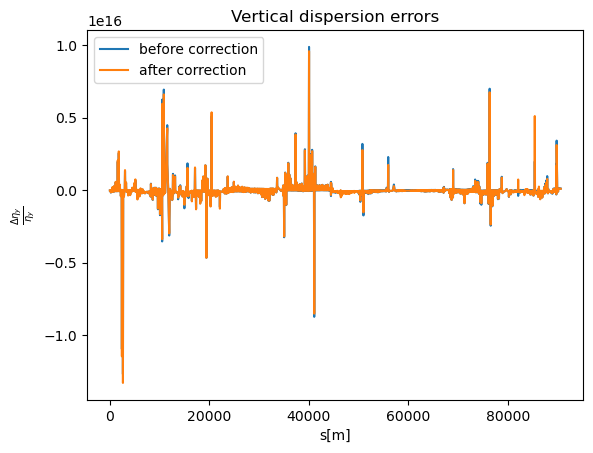


Fitting Tune...
Initial value [218.15589991 222.20039559]
iter# 0 Res. 1.309764213122676e-09
iter# 1 Res. 1.6351882194822923e-13
Final value [218.15869257 222.1980262 ] 


Fitting Chromaticity...
Initial value [1.83876315 2.59854076]
iter# 0 Res. 1.5412111747891302e-06
iter# 1 Res. 7.364457053914044e-08
iter# 2 Res. 1.863326151321249e-07
Final value [0.03372873 5.01687156] 

Beta beating before correction :
RMS horizontal beta beating:1.9109148474030602%   RMS vertical beta beating: 0.7382000314879442%
Beta beating after corrections :
RMS horizontal beta beating:3.239079092967555%   RMS vertical beta beating: 41.97769431135275%
beta_x correction reduction -69.50410413993455
beta_x correction reduction -5586.493161852202
dispersion
dispersion before correction :
RMS horizontal dispersion:145.18456971412667mm   RMS vertical dispersion: 32.82369756093769mm
dispersion after corrections
RMS horizontal dispersion:86.37546157732329mm   RMS vertical dispersion: 26.255751361538124mm
dispersion

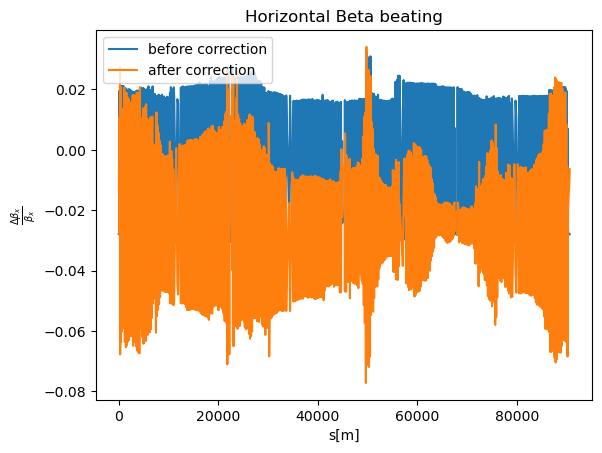

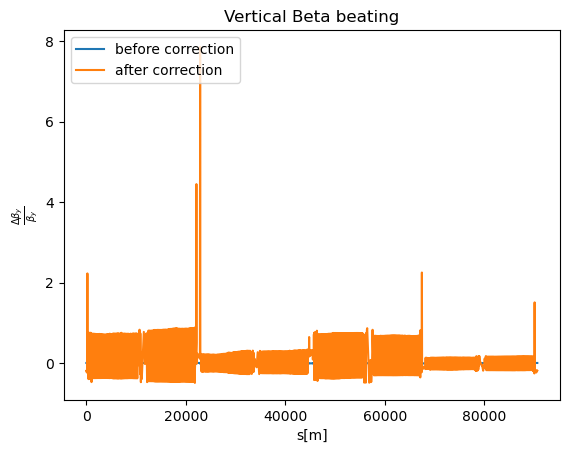

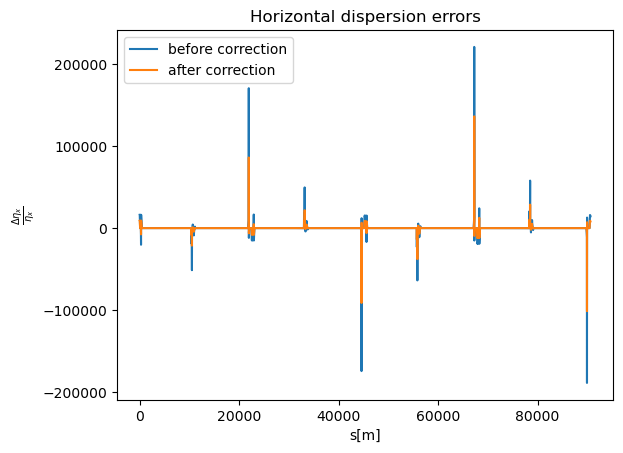

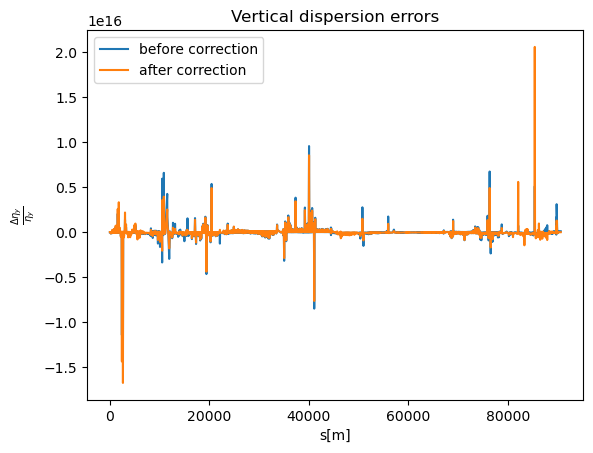


Fitting Tune...
An error occurred for Seed_3: Unstable ring
--------------------------------Seed_4---------------------------------------
 Turn sext off 
 BPM_to_corrector_response_matrices (Model) ..
 Introduce errors .. 
SVD orbit correction
Swich sextupoles ON
LOCO iterations

Fitting Tune...
An error occurred for Seed_4: Unstable ring
Execution time For: 4 seeds = 0.18377742495801713 hours
Number of failed seeds: 4


In [1]:
import at
import os
from at_modules_loco import *
from data_loader_off import load_data, set_parameters,load_indices
from multiprocessing import Pool
output_root = '.\output'

error_folder = os.path.join(output_root, 'error')
correction_folder = os.path.join(output_root, 'correction')
os.makedirs(error_folder, exist_ok=True)
os.makedirs(correction_folder, exist_ok=True)

num_seeds = list(range(1, 5)) # 51 seeds
ring = at.load_mat('FCCee_z_572_nosol_1_bb_bcs_norm')
ring.radiation_off()
num_used_correctors = 20

#Loading data & parameters
dCx_s, dCy_s, dCxy_s, dCyx_s, dCx, dCy, dCxy, dCyx, dCxs, dCys, dCxys, dCyxs, Rvx, Rvy = load_data()
num_used_correctors, correctors_kick, dk, numberOfIteration, sCut = set_parameters()
quads_indices, bpm_indices, corrector_indices, dipole_indices, used_cor_indices, \
sext_indexes, skew_quad, q_noskew, arc_quads, ir_quads, arc_sext,  ir_sext , arc_dipoles, ir_dipoles, nominal_crom, nominal_tune = load_indices(ring, num_used_correctors)

# Misalgined elemnts

misaligned_elements = arc_quads
misaligned_elements2 = arc_sext

shiftx = 20.e-6
shifty = 20.e-6
tilts = 20.e-6
pitches = 20.e-6
yaws = 20.e-6
#gradErr = 1.e-4
sigmaCut = 2.5 #sigma error cut
failed_seeds = 0
t0 = time.time()
for i in num_seeds:
    try:
        print(f"--------------------------------Seed_{i}---------------------------------------")
        ring = at.load_mat('FCCee_z_572_nosol_1_bb_bcs')
        ring.radiation_off()
        Cx0_on, Cxy0_on, Cy0_on, Cyx0_on = ORMs(correctors_kick, ring,used_cor_indices)

        print(' Turn sext off ')
        sext_strengths = []
        for n in sext_indexes:
            sext_strengths.append(ring[n].H)
            ring[n].H = 0.0

        [elemdata0, beamdata, elemdata] = at.get_optics(ring, bpm_indices)
        twiss = elemdata
        print(" BPM_to_corrector_response_matrices (Model) ..")
        Cx0, Cxy0, Cy0, Cyx0 = ORMs(correctors_kick, ring,used_cor_indices)

        print(" Introduce errors .. ")

        simulateShiftErrors(ring, shiftx,shifty, misaligned_elements, sigmaCut,  relative=True)
        simulateShiftErrors(ring, shiftx,shifty, misaligned_elements2, sigmaCut,  relative=True)
        simulateShiftErrors(ring, shiftx,shifty, dipole_indices, sigmaCut,  relative=True)

        simulateTilttErrors(ring, tilts,pitches, yaws,misaligned_elements , sigmaCut, relative=True)
        simulateTilttErrors(ring, tilts,pitches, yaws,misaligned_elements2 , sigmaCut, relative=True)
        simulateTilttErrors(ring, tilts,0, 0,dipole_indices , sigmaCut, relative=True)

        filename = f'seed_{i}.mat'
        output_file_path = os.path.join(error_folder, filename)
        ring.save(output_file_path, mat_key='ring')


        print('SVD orbit correction')
        _, _, elemdata = at.get_optics(ring, bpm_indices)
        closed_orbitx = elemdata.closed_orbit[:, 0]
        closed_orbity = elemdata.closed_orbit[:, 2]
        CSx = np.dot(np.transpose(Rvx),-closed_orbitx)
        CSy = np.dot(np.transpose(Rvy),-closed_orbity)
        for m in range(len(corrector_indices)):
            ring[corrector_indices[m]].KickAngle  = [0,0]
            ring[corrector_indices[m]].KickAngle  = [CSx[m],CSy[m]]


        print("Swich sextupoles ON")
        for a in range(len(sext_indexes)):
            ring[sext_indexes[a]].H = sext_strengths[a]*1

        print('LOCO iterations')
        for x in range(numberOfIteration):
            print('Beta Beating Correction')
            _, _, twiss_err = at.get_optics(ring, bpm_indices)
            fit_tune(ring, get_refpts(ring, 'QF*'),
            get_refpts(ring, 'QD*'),nominal_tune)
            fit_chrom(ring, get_refpts(ring, 'SF*'),
            get_refpts(ring, 'SD*'),nominal_crom)
            Cx, Cxy, Cy, Cyx = ORMs(correctors_kick, ring,used_cor_indices)
            bx_rms_err, by_rms_err = getBetaBeat(ring, twiss, bpm_indices, makeplot = False)
            dx_rms_err, dy_rms_err = getDispersionErr(ring, twiss, bpm_indices, makeplot = False)
            A, B = defineJacobianMatrices_(Cx0, Cy0, Cx, Cy, dCx, dCy)
            Nk = len(dCx)
            r = getInverse(A, B, Nk, sCut, showPlots = False)
            setCorrection(ring, r , q_noskew)
            _, _, twiss_cor = at.get_optics(ring, bpm_indices)
            print('Beta beating before correction :')
            print("RMS horizontal beta beating:" + str(bx_rms_err * 100) + "%   RMS vertical beta beating: " + str(by_rms_err * 100) + "%")
            print('Beta beating after corrections :')
            bx_rms_cor, by_rms_cor = getBetaBeat(ring, twiss, bpm_indices, makeplot = False)
            print("RMS horizontal beta beating:" + str(bx_rms_cor * 100) + "%   RMS vertical beta beating: " + str(by_rms_cor * 100) + "%")
            print('beta_x correction reduction', (1-bx_rms_cor/bx_rms_err)*100)
            print('beta_x correction reduction', (1-by_rms_cor/by_rms_err)*100)
            print('========================================')
            print('dispersion')
            print('========================================')
            print('dispersion before correction :')
            print("RMS horizontal dispersion:" + str(dx_rms_err ) + "mm   RMS vertical dispersion: " + str(dy_rms_err) + "mm")
            print('dispersion after corrections')
            dx_rms_cor, dy_rms_cor = getDispersionErr(ring, twiss, bpm_indices, makeplot = False)
            print("RMS horizontal dispersion:" + str(dx_rms_cor ) + "mm   RMS vertical dispersion: " + str(dy_rms_cor) + "mm")
            print('dispersion_x correction reduction', (1-dx_rms_cor/dx_rms_err)*100)
            print('dispersion_y correction reduction', (1-dy_rms_cor/dy_rms_err)*100)

            corrections_plots(ring ,twiss, twiss_err, 'beta')
            corrections_plots(ring ,twiss, twiss_err, 'eta')

            _, _, twiss_err = at.get_optics(ring, bpm_indices)
            print('Dispersion Correction')
            fit_tune(ring, get_refpts(ring, 'QF*'),
            get_refpts(ring, 'QD*'),nominal_tune)
            fit_chrom(ring, get_refpts(ring, 'SF*'),
            get_refpts(ring, 'SD*'),nominal_crom)
            Cx, Cxy, Cy, Cyx = ORMs(correctors_kick, ring,used_cor_indices)
            bx_rms_err, by_rms_err = getBetaBeat(ring, twiss, bpm_indices, makeplot = False)
            dx_rms_err, dy_rms_err = getDispersionErr(ring, twiss, bpm_indices, makeplot = False)
            A, B = defineJacobianMatrices1(Cx0, Cy0, Cxy0, Cyx0, Cx, Cy, Cxy, Cyx, dCxs, dCys, dCxys,dCyxs)
            Nk = len(dCxs)
            r = getInverse(A, B, Nk, sCut, showPlots = False)
            setCorrection(ring, r[:len(q_noskew)] , q_noskew)
            setCorrection(ring, r[len(q_noskew):] , skew_quad)
            _, _, twiss_cor = at.get_optics(ring, bpm_indices)
            print('Beta beating before correction :')
            print("RMS horizontal beta beating:" + str(bx_rms_err * 100) + "%   RMS vertical beta beating: " + str(by_rms_err * 100) + "%")
            print('Beta beating after corrections :')
            bx_rms_cor, by_rms_cor = getBetaBeat(ring, twiss, bpm_indices, makeplot = False)
            print("RMS horizontal beta beating:" + str(bx_rms_cor * 100) + "%   RMS vertical beta beating: " + str(by_rms_cor * 100) + "%")
            print('beta_x correction reduction', (1-bx_rms_cor/bx_rms_err)*100)
            print('beta_x correction reduction', (1-by_rms_cor/by_rms_err)*100)
            print('========================================')
            print('dispersion')
            print('========================================')
            print('dispersion before correction :')
            print("RMS horizontal dispersion:" + str(dx_rms_err ) + "mm   RMS vertical dispersion: " + str(dy_rms_err) + "mm")
            print('dispersion after corrections')
            dx_rms_cor, dy_rms_cor = getDispersionErr(ring, twiss, bpm_indices, makeplot = False)
            print("RMS horizontal dispersion:" + str(dx_rms_cor ) + "mm   RMS vertical dispersion: " + str(dy_rms_cor) + "mm")
            print('dispersion_x correction reduction', (1-dx_rms_cor/dx_rms_err)*100)
            print('dispersion_y correction reduction', (1-dy_rms_cor/dy_rms_err)*100)

            corrections_plots(ring ,twiss, twiss_err, 'beta')
            corrections_plots(ring ,twiss, twiss_err, 'eta')





        filename = f'seed_{i}.mat'
        output_file_path = os.path.join(correction_folder, filename)
        ring.save(output_file_path, mat_key='ring')
    except Exception as e:
        print(f"An error occurred for Seed_{i}: {str(e)}")
        failed_seeds += 1
        continue

t1 = time.time()
print(f"Execution time For: {len(num_seeds)} seeds = {(t1 - t0) / 3600} hours")
print(f"Number of failed seeds: {failed_seeds}")

